In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as metrics
import sklearn.model_selection as ms
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir('C:\\Users\\Harrison\\Documents\\GitHub\\ML-Notes')
from VisualFuncs import VDR

# 1.6 Nearest Neighbors

sklearn.neighbors is designed for both supervised and unsupervised training tasks.

Nearest neighbors seeks to dind a set number of training samples closest in euclidean distance to the new point, and predict a label from information of the nearest neighbors. K nearest neighbors is based on a set number of neighbors, radius based neighbor learning finds all neighbors who fall in a certain radial distance from the new point.

Nearest Neighbors is a non generalizing model since it does not update weights oor learn from the training data. Non- parametric method.




## 1.6.1 Unsupervised Nearest Neighbors

"NearestNeighbors" class implements unsupervised nearest neighbor learning. Choose between BallTree, KDTree, and Brute through the 'algorithm' hyperparameter.

'algorithm' must be one of the following: ['auto', 'ball_tree', 'kd_tree', 'brute']

http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms

#### "Brute Force"
The brute force computation of distances between all pairs of points in the dataset. With n samples in d dimensions O(dn^2)... Not feasible for large n.


#### "K-D Tree"
Creates a tree based datastructure to reduce the number of calculations required. Encodes closeness information in the branching of the tree. O(d n log(n)). "The KD tree is a binary tree structure which recursively partitions the parameter space along the data axes, dividing it into nested orthotropic regions into which data points are filed...Though the KD tree approach is very fast for low-dimensional (D < 20) neighbors searches, it becomes inefficient as D grows very large:"


#### Ball Tree

Addresses the inefficiencies of KD Trees in high dimenisions. Ball trees partition data in a series of nested hyper spheres, making tree construction more costly than KD, but is more efficient in high d.





In [9]:
from sklearn.neighbors import NearestNeighbors
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

nbrs = NearestNeighbors(n_neighbors = 3, algorithm = 'ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices

array([[0, 1, 2],
       [1, 0, 2],
       [2, 1, 0],
       [3, 4, 5],
       [4, 3, 5],
       [5, 4, 3]], dtype=int64)

Notice that here we calculate the nearest neighbors to each sample in the dataset. Each row in the above matix are the 3 closest neighbors to that sample row in the X matrix. Each column represents the nearest neighbors from right to left.

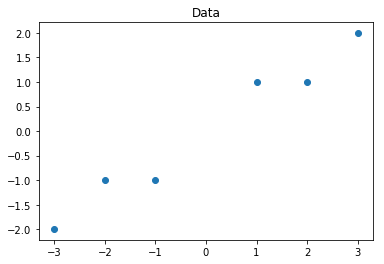

In [17]:
plt.scatter(X[:,0], X[:,1])
plt.title('Data')
plt.show()

### 1.6.2 Nearest Neighbor Classification

Classification is determined by a majority vote of a new points nearest neighbors. The two nearest neighbors classifiers are "KNeighborsClassifier" and "RadiusNeighborsClassifier"

Weights can be adjusted. By default weights = 'uniform' meaning all nearest neighbors have equal vote, whereas weights = 'distance' gives a higher weighted vote to closer neighbors.

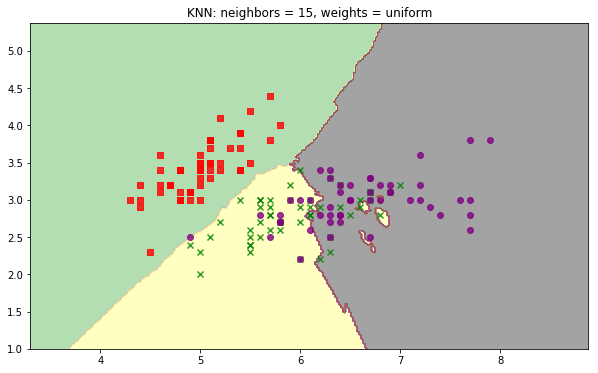

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

X, y = load_iris().data[:,[0,1]],  load_iris().target


KNN = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform').fit(X, y)
plt.figure(figsize = (10,6))
plt.title('KNN: neighbors = 15, weights = uniform')
VDR(X, y, KNN)

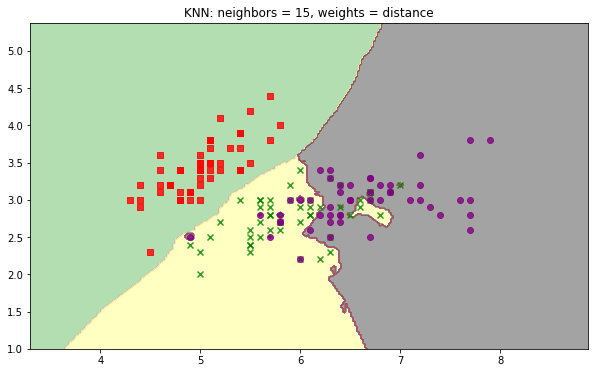

In [39]:
KNN = KNeighborsClassifier(n_neighbors = 15, weights = 'distance').fit(X, y)
plt.figure(figsize = (10,6))
plt.title('KNN: neighbors = 15, weights = distance')
VDR(X, y, KNN)

### 1.6.3 Nearest Neighbors Regression

Label assignment of a new point is the mean of its nearest neighbors. The weighting can be uniform as in a standard mean computation, or can be adjusted for distance.
"KNeighborsRegressor" and "RadiusNeighborsRegressor"

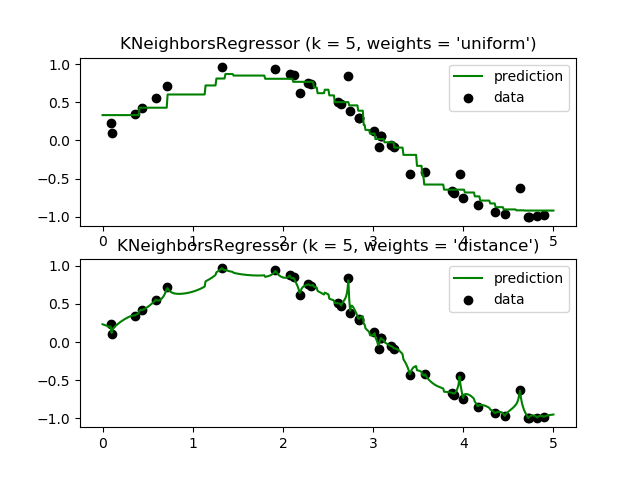



### 1.6.4 Nearest Centroid Classifier

"If we dont know what something is, guess that it is the average of the things aroung it."

"NearestCentroid" Classifier represents each class as the centroid of its members, then asks which  centroid is the new data point closer to?

# 1.7 Gaussian Processes

http://scikit-learn.org/stable/modules/gaussian_process.html

A generic supervised learning model designed to solve regression and probalistic classification. Because of being probabilistic we can compute confidence intervals for each region of interest. Similar to SVM in the use of kernels.

Very bad for high dimensional dpaces (features>12)


# 1.9 Naive Bayes

Bayes theorem with the naive assumption of independence between features.

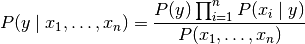

Throw out the bottom term as an arbitrary constant, and you are left with the decision rule.

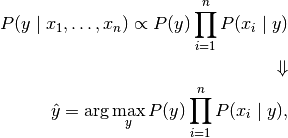


P(y) is the frequency of class y in the training set. $P(x_i | y)$ is  calculated using different distributions for each type of classifier.

Naive bayes models require a small amount of training data to work well, and are extremely fast, works well with high D data. Good classifier bad estimator, predict_proba not to be taken seriously.



### GaussianNB 

Implements Gaussian Naive Bayes for classification. Assumes the likelihood of each feature is a Gaussian distribution.

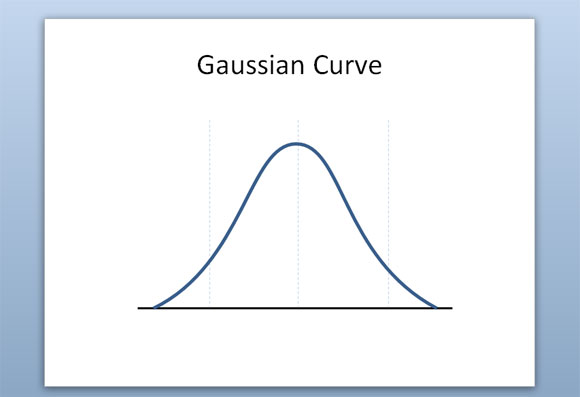

In [7]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, y)
y_pred = gnb.predict(X)

from sklearn.metrics import classification_report
print(classification_report(y, y_pred))


             precision    recall  f1-score   support

          0       1.00      0.98      0.99        59
          1       0.99      0.99      0.99        71
          2       0.98      1.00      0.99        48

avg / total       0.99      0.99      0.99       178



### MultinomialNB
Multinomially distributed data generally used in text classification. Read more into this.

### BernoulliNB

Implements Naive Bayes for Bernoulli distributions (binary data). In NLP word occurence matrices would need to be used rether than count vectorizers. May perform better than MultinomailNB for shorter documents, though both should be evaluated.

### Out of Core Learning. 

All naive bayes models have partial_fit methods for online learning.

http://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html#sphx-glr-auto-examples-applications-plot-out-of-core-classification-py